In [1]:
# This notebook uses our code to compare to the Uranus model
# Allona Vazan gave us.   It allowed us to callibrate our code
# and is useful as a good sanity test.

In [2]:
# This cell sets the working directory so that the code will work on the cloud as well.

import os
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "test":
    os.chdir('./..')

In [3]:
import numpy as np
import random
from matplotlib               import pyplot as plt
from matplotlib.pyplot        import figure, legend

import lib.temperature as temperature
import lib.mc_density  as mc_density
import lib.mc_interior as mc_interior
import lib.allona      as allona
import lib.constants   as constants

In [4]:
# Load the temperature/pressure/densities from Allona's model.

temp = allona.allona_temp()
p = allona.allona_pressure()
rho = allona.allona_density()

In [5]:
# Create a model from the inputs we got from Allona.   
# Note that we are using "Z" and "env", where:
#
# "Z" = 65% dunite, 35% water.
# "env" = 75% H, 25% He.  
#
# In practice, Allona's model uses a slightly different percentages to
# Create the raw elements, which will lead to a different composition.
# (though the temp/pressure/density should stay the same as we are trying to match it).
 
allona_planet = allona.allona_mcinterior(catalog=temperature.allona_model_catalog())


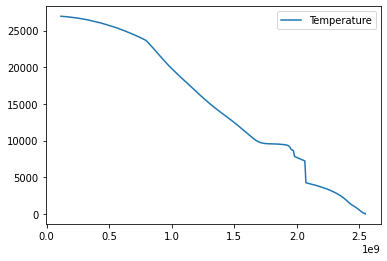

In [6]:
# Compare the temperature we get from our model to
# "allona_temp" -- the actual temperatures Allona gave us.

allona_planet.plot_temp()
#plt.plot(allona_planet._radii, np.array(allona.allona_temp()[1:]), label="allona_temp")
plt.legend()

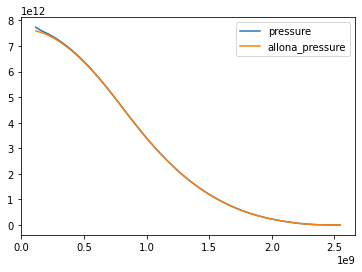

In [7]:
# Similarly, comparing pressures.

allona_planet.plot_pressure()
plt.plot(allona_planet._radii, np.array(p[1:]), label="allona_pressure")
plt.legend()

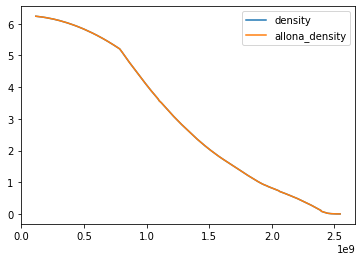

In [8]:
# Comparing densities

allona_planet.plot_densities()
plt.plot(allona_planet._radii, np.array(rho[1:]), label="allona_density")
plt.legend()

[0.14, 0.86, 0.0]

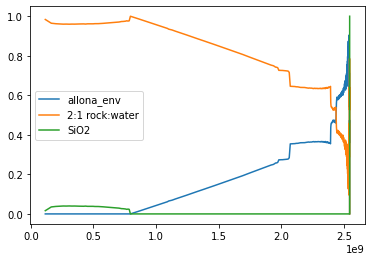

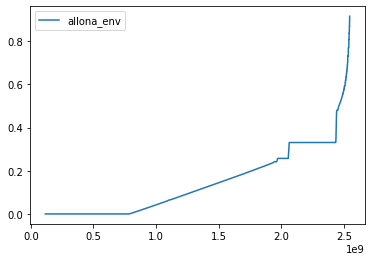

In [9]:
# This shows the amount of rock/env per shell.
# For this plot we only used 2 materials, "Z" and "env",
# So the rock comes out zero everywhere.

# Compute ratios shows us that the model used 
# 85% "Z" and 15% "env".
env_pct = allona.allona_env_pct()
allona_planet.plot_mix()
plt.figure()
plt.plot(allona_planet._radii, np.array(env_pct), label="allona_env")
plt.legend()
allona_planet.get_mix_ratios()